In [2]:
#Python 3 notebook
import numpy as np
import pandas as pd
from functools import reduce
from math import floor, ceil
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

In [130]:
#Loading the data
data = pd.read_csv('data.csv',header = 1, names =['date', 'prices', 'gold', 'compound', 'neg', 'neu', 'pos' ] )
data = data.set_index('date')
#Obtaining the past data in a different column
data['past_prices'] = data.loc[:,'prices'].shift(30)
data = data.iloc[450:data.shape[0]]
#Splitting train and test dataset
train_size = floor(0.8*data.shape[0])
train_data = data.iloc[0:train_size]
test_data = data.iloc[train_size:]
print('Total data size: ',data.shape[0],'. Train data size: ', train_data.shape[0], '. Test data size: ', test_data.shape[0], '.',sep='')

Total data size: 732. Train data size: 585. Test data size: 147.


MAE: 108.12326388888889


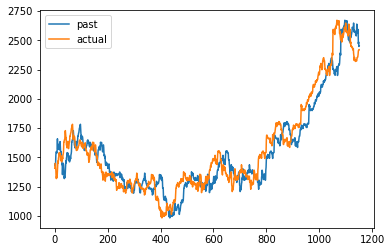

In [23]:
#Case of someone just used the past data to predict - 
plt.plot( range(0,data.shape[0]), data.loc[:,'past_prices'], range(0,data.shape[0]), data.loc[:,'prices'].as_matrix())
plt.legend(['past','actual'])
print('MAE: ' + str(np.mean(np.abs(data.loc[:,'past_prices'] - data.loc[:,'prices']))))

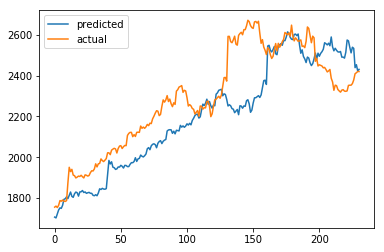

Neural Networks Stats:
	Score: 0.32040289367820274. Mean Absolute Error: 125.22399154305711. R2 Score: 0.5808102999154171


In [114]:
from sklearn.neural_network import MLPRegressor

mlpc = MLPRegressor(hidden_layer_sizes=(20) ,alpha=10, activation='relu',learning_rate_init = 0.01, solver='adam', shuffle = False)
mlpc.fit(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted = mlpc.predict(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix())
#offset = np.mean(train_data.loc[:,'prices'].as_matrix()) - np.mean(mlpc.predict(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix()))
plt.plot( range(0,test_data.shape[0]), predicted , range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.show()
# Evaluating the regressor
score = mlpc.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
mean = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
r2 = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
print('Neural Networks Stats:\n\tScore: ',score,'. Mean Absolute Error: ',mean,'. R2 Score: ',r2, sep='')

In [95]:
#from sklearn.dummy import DummyClassifier
#dummy = DummyClassifier(strategy='most_frequent', random_state=0)
#dummy.fit(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
#score_dummy = dummy.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
#predicted_dummy = dummy.predict(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix())
#mean_dummy = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_dummy))
#r2_dummy = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_dummy))
#print('Dummy Stats:\n\tScore: ',score_dummy,'. Mean Absolute Error: ',mean_dummy,'. R2 Score: ',r2_dummy, sep='')

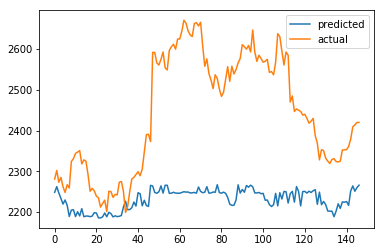

Random Forests Regressor Stats:
	Score: -1.9728130193240052. Mean Absolute Error: 210.78520408163266. R2 Score: -1.9728130193240054


In [137]:
from sklearn.ensemble import RandomForestRegressor
rfrm = RandomForestRegressor(n_estimators=40, criterion='mae',
                             max_depth=6, min_samples_split=2,
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0,
                             max_features='auto', max_leaf_nodes=None,
                             min_impurity_decrease=0.0, min_impurity_split=None,
                             bootstrap=True, oob_score=False, n_jobs=1, random_state=None,
                             verbose=0, warm_start=False)
rfrm.fit(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted_rfrm = rfrm.predict(test_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
plt.plot(range(0,test_data.shape[0]), predicted_rfrm, range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.title('Random Forest')
plt.show()
# Evaluating the regressor
score_rfrm = rfrm.score(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),test_data.loc[:,'prices'].as_matrix())
mean_rfrm = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_rfrm))
r2_rfrm = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_rfrm))
print('Random Forests Regressor Stats:\n\tScore: ',score_rfrm,'. Mean Absolute Error: ',mean_rfrm,'. R2 Score: ',r2_rfrm, sep='')

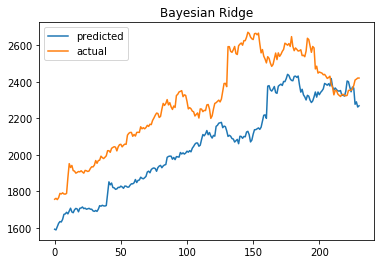

Bayesian Ridge Regressor Stats:
	Score: 0.6232281468187237. Mean Absolute Error: 231.96117018603672. R2 Score: -0.1374507434064558


In [125]:
from sklearn import linear_model
brm = linear_model.BayesianRidge()
brm.fit(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted_brm = brm.predict(test_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
plt.plot( range(0,test_data.shape[0]), predicted_brm, range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.title('Bayesian Ridge')
plt.show()
# Evaluating the regressor
score_brm = brm.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
mean_brm = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_brm))
r2_brm = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted_brm))
print('Bayesian Ridge Regressor Stats:\n\tScore: ',score_brm,'. Mean Absolute Error: ',mean_brm,'. R2 Score: ',r2_brm, sep='')

In [21]:
brm.coef_

array([ 0.80259997,  0.21219785, -0.2213147 ,  0.00541615, -0.00424801,
       -0.00112608])

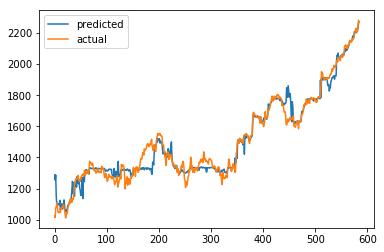

In [138]:
predicted_rfrm = rfrm.predict(train_data.loc[:,('past_prices','gold','compound', 'neg', 'neu', 'pos')].as_matrix())
plt.plot(range(0,train_data.shape[0]), predicted_rfrm, range(0,train_data.shape[0]), train_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.show()

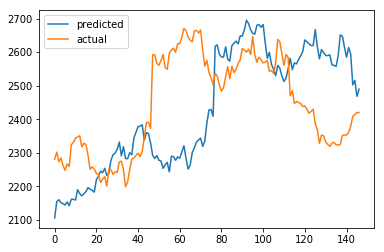

Neural Networks Stats:
	Score: 0.8431722323438912. Mean Absolute Error: 148.36055356771234. R2 Score: -0.6547024263256171


In [135]:
from sklearn.neural_network import MLPRegressor

mlpc = MLPRegressor(hidden_layer_sizes=(20) ,alpha=10, activation='relu',learning_rate_init = 0.01, solver='lbfgs', shuffle = False)
mlpc.fit(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
predicted = mlpc.predict(test_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix())
#offset = np.mean(train_data.loc[:,'prices'].as_matrix()) - np.mean(mlpc.predict(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix()))
plt.plot( range(0,test_data.shape[0]), predicted , range(0,test_data.shape[0]), test_data.loc[:,'prices'].as_matrix())
plt.legend(['predicted','actual'])
plt.show()
# Evaluating the regressor
score = mlpc.score(train_data.loc[:,('past_prices','gold', 'compound', 'neg', 'neu', 'pos')].as_matrix(),train_data.loc[:,'prices'].as_matrix())
mean = mean_absolute_error(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
r2 = r2_score(list(test_data.loc[:,'prices'].as_matrix()), list(predicted))
print('Neural Networks Stats:\n\tScore: ',score,'. Mean Absolute Error: ',mean,'. R2 Score: ',r2, sep='')